In [69]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms

In [71]:
# Get datasets
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=False,
    transform=transforms.Compose([
        transforms.Resize((32, 32)), # because LeNet is for 32*32 image, so we change these datas to 32*32
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.1307,), std = (0.3081,))
    ])
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=False,
    transform=transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.1325,), std = (0.3105,))
    ])
)

# Dataloader
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

Sandal


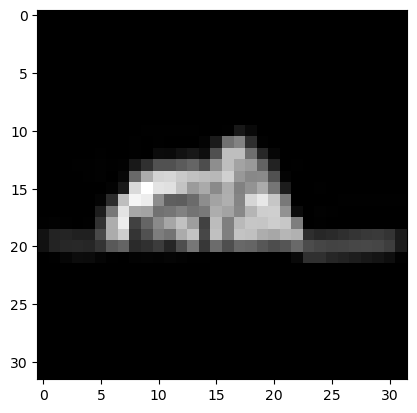

In [72]:
from matplotlib import pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

img_idx = torch.randint(len(train_loader), (1,)).item()
plt.imshow(training_data[img_idx][0].squeeze(), cmap='gray') # trianing_data[idx] = img, label
print(labels_map[training_data[img_idx][1]])

In [73]:
img_feature, label = next(iter(train_loader))
img_feature.squeeze().shape # (BatchSize, Width, Height)

torch.Size([64, 32, 32])

In [94]:
# Build Model
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        # conv layer
        self.convLayer1 = nn.Sequential(
            # number of channel input, number of channel output, kernelsize
            nn.Conv2d(1, 6, 5), 
            nn.BatchNorm2d(6),
            nn.Tanh(),
            # kernel size 2*2, stride: 2
            nn.MaxPool2d(2, stride=2),
        )
        self.convLayer2 = nn.Sequential(
            nn.Conv2d(6, 16, 5), 
            nn.BatchNorm2d(16),
            nn.Tanh(),
            nn.MaxPool2d(2, stride=2), 
        )
        
        # fully connect layer
        self.fc = nn.Sequential(
            nn.Linear(400, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10),
        )
        
        # flatten layer
        self.flatten = nn.Flatten()
        
    def __call__(self, x):
        x = self.convLayer1(x)
        x = self.convLayer2(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

In [95]:
model = LeNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [96]:
num_epochs = 10
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch:{epoch+1}, Loss:{loss}')

Epoch:1, Loss:0.5486860275268555
Epoch:2, Loss:0.6390359997749329
Epoch:3, Loss:0.49598124623298645
Epoch:4, Loss:0.1753852516412735
Epoch:5, Loss:0.19569051265716553
Epoch:6, Loss:0.46387776732444763
Epoch:7, Loss:0.49587389826774597
Epoch:8, Loss:0.26495617628097534
Epoch:9, Loss:0.3514784276485443
Epoch:10, Loss:0.16217520833015442


In [98]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, prediction = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()
        
    print(f'Accuracy: {100*correct/total}')

Accuracy: 88.45
